In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("D:/data science/Assignments/Random_forest/Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [39]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [40]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [41]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [42]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [43]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


AxesSubplot(0.125,0.11;0.775x0.77)


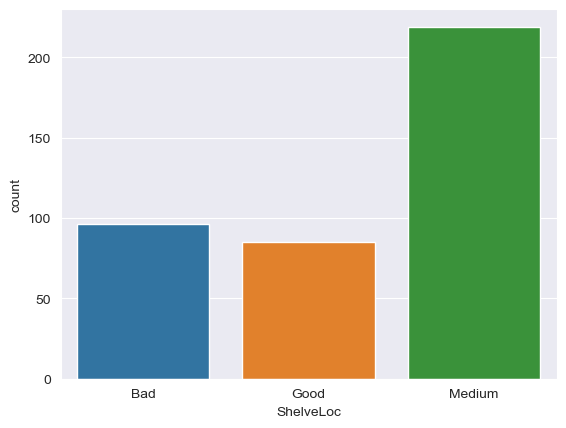

In [44]:
import seaborn as sns
print(sns.countplot(x="ShelveLoc", data=df))

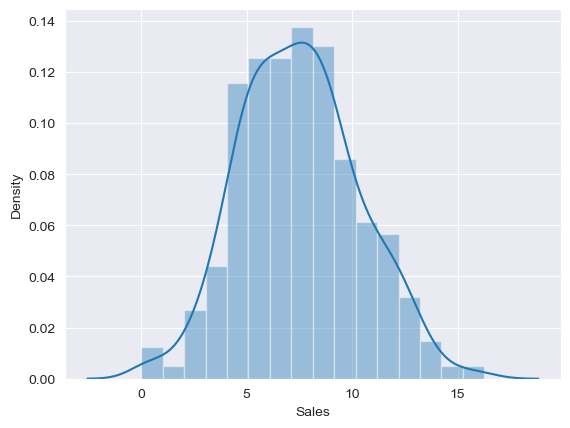

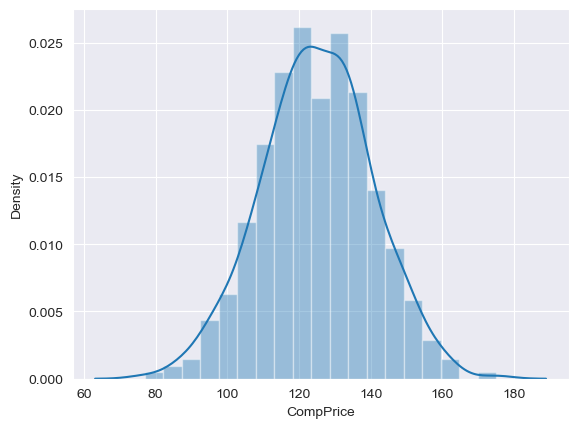

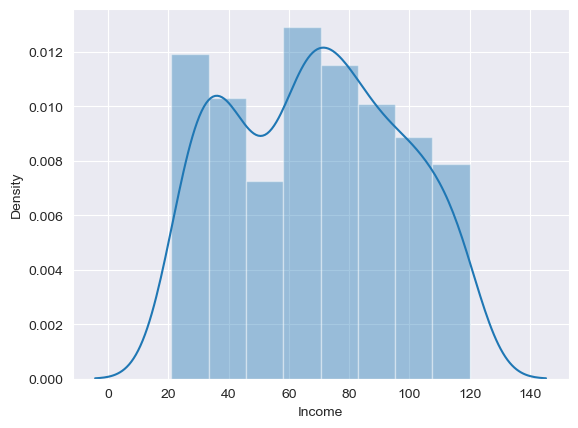

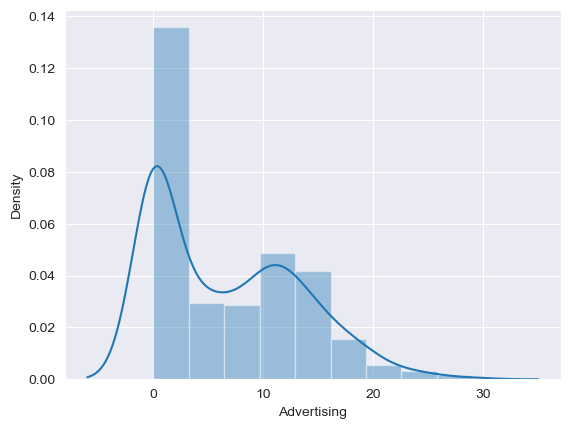

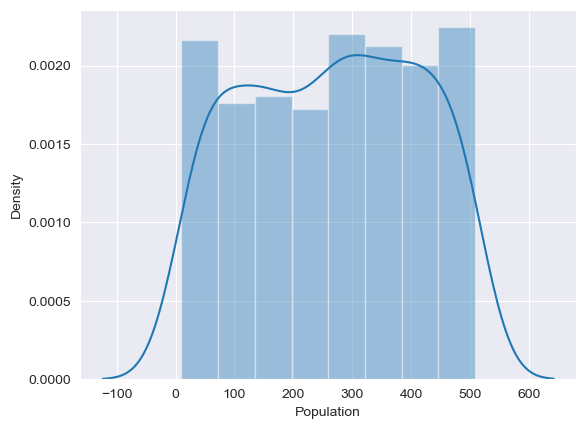

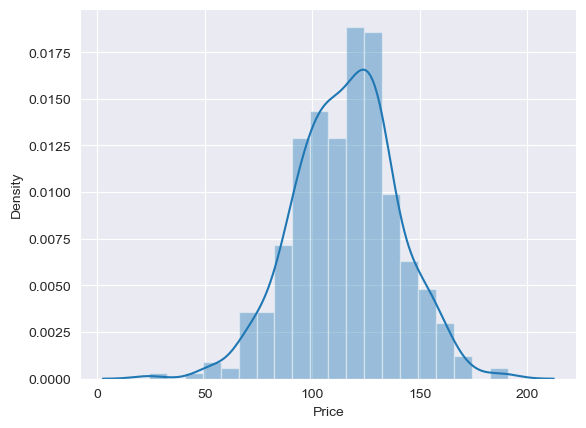

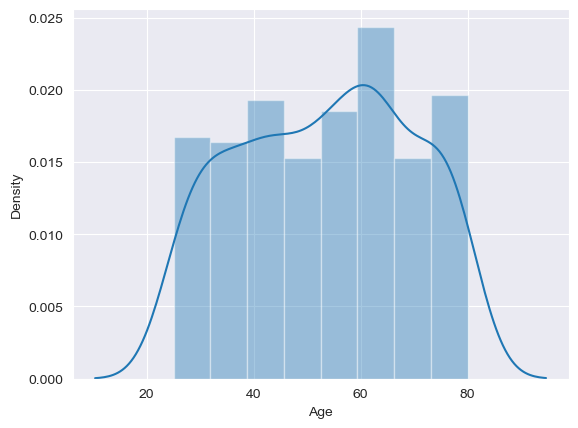

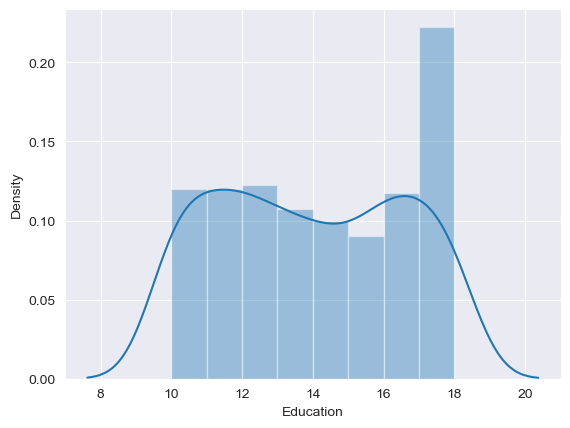

<Figure size 640x480 with 0 Axes>

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df:
    if (df[i].dtypes)!="O":
        sns.distplot(df[i])
        plt.figure()

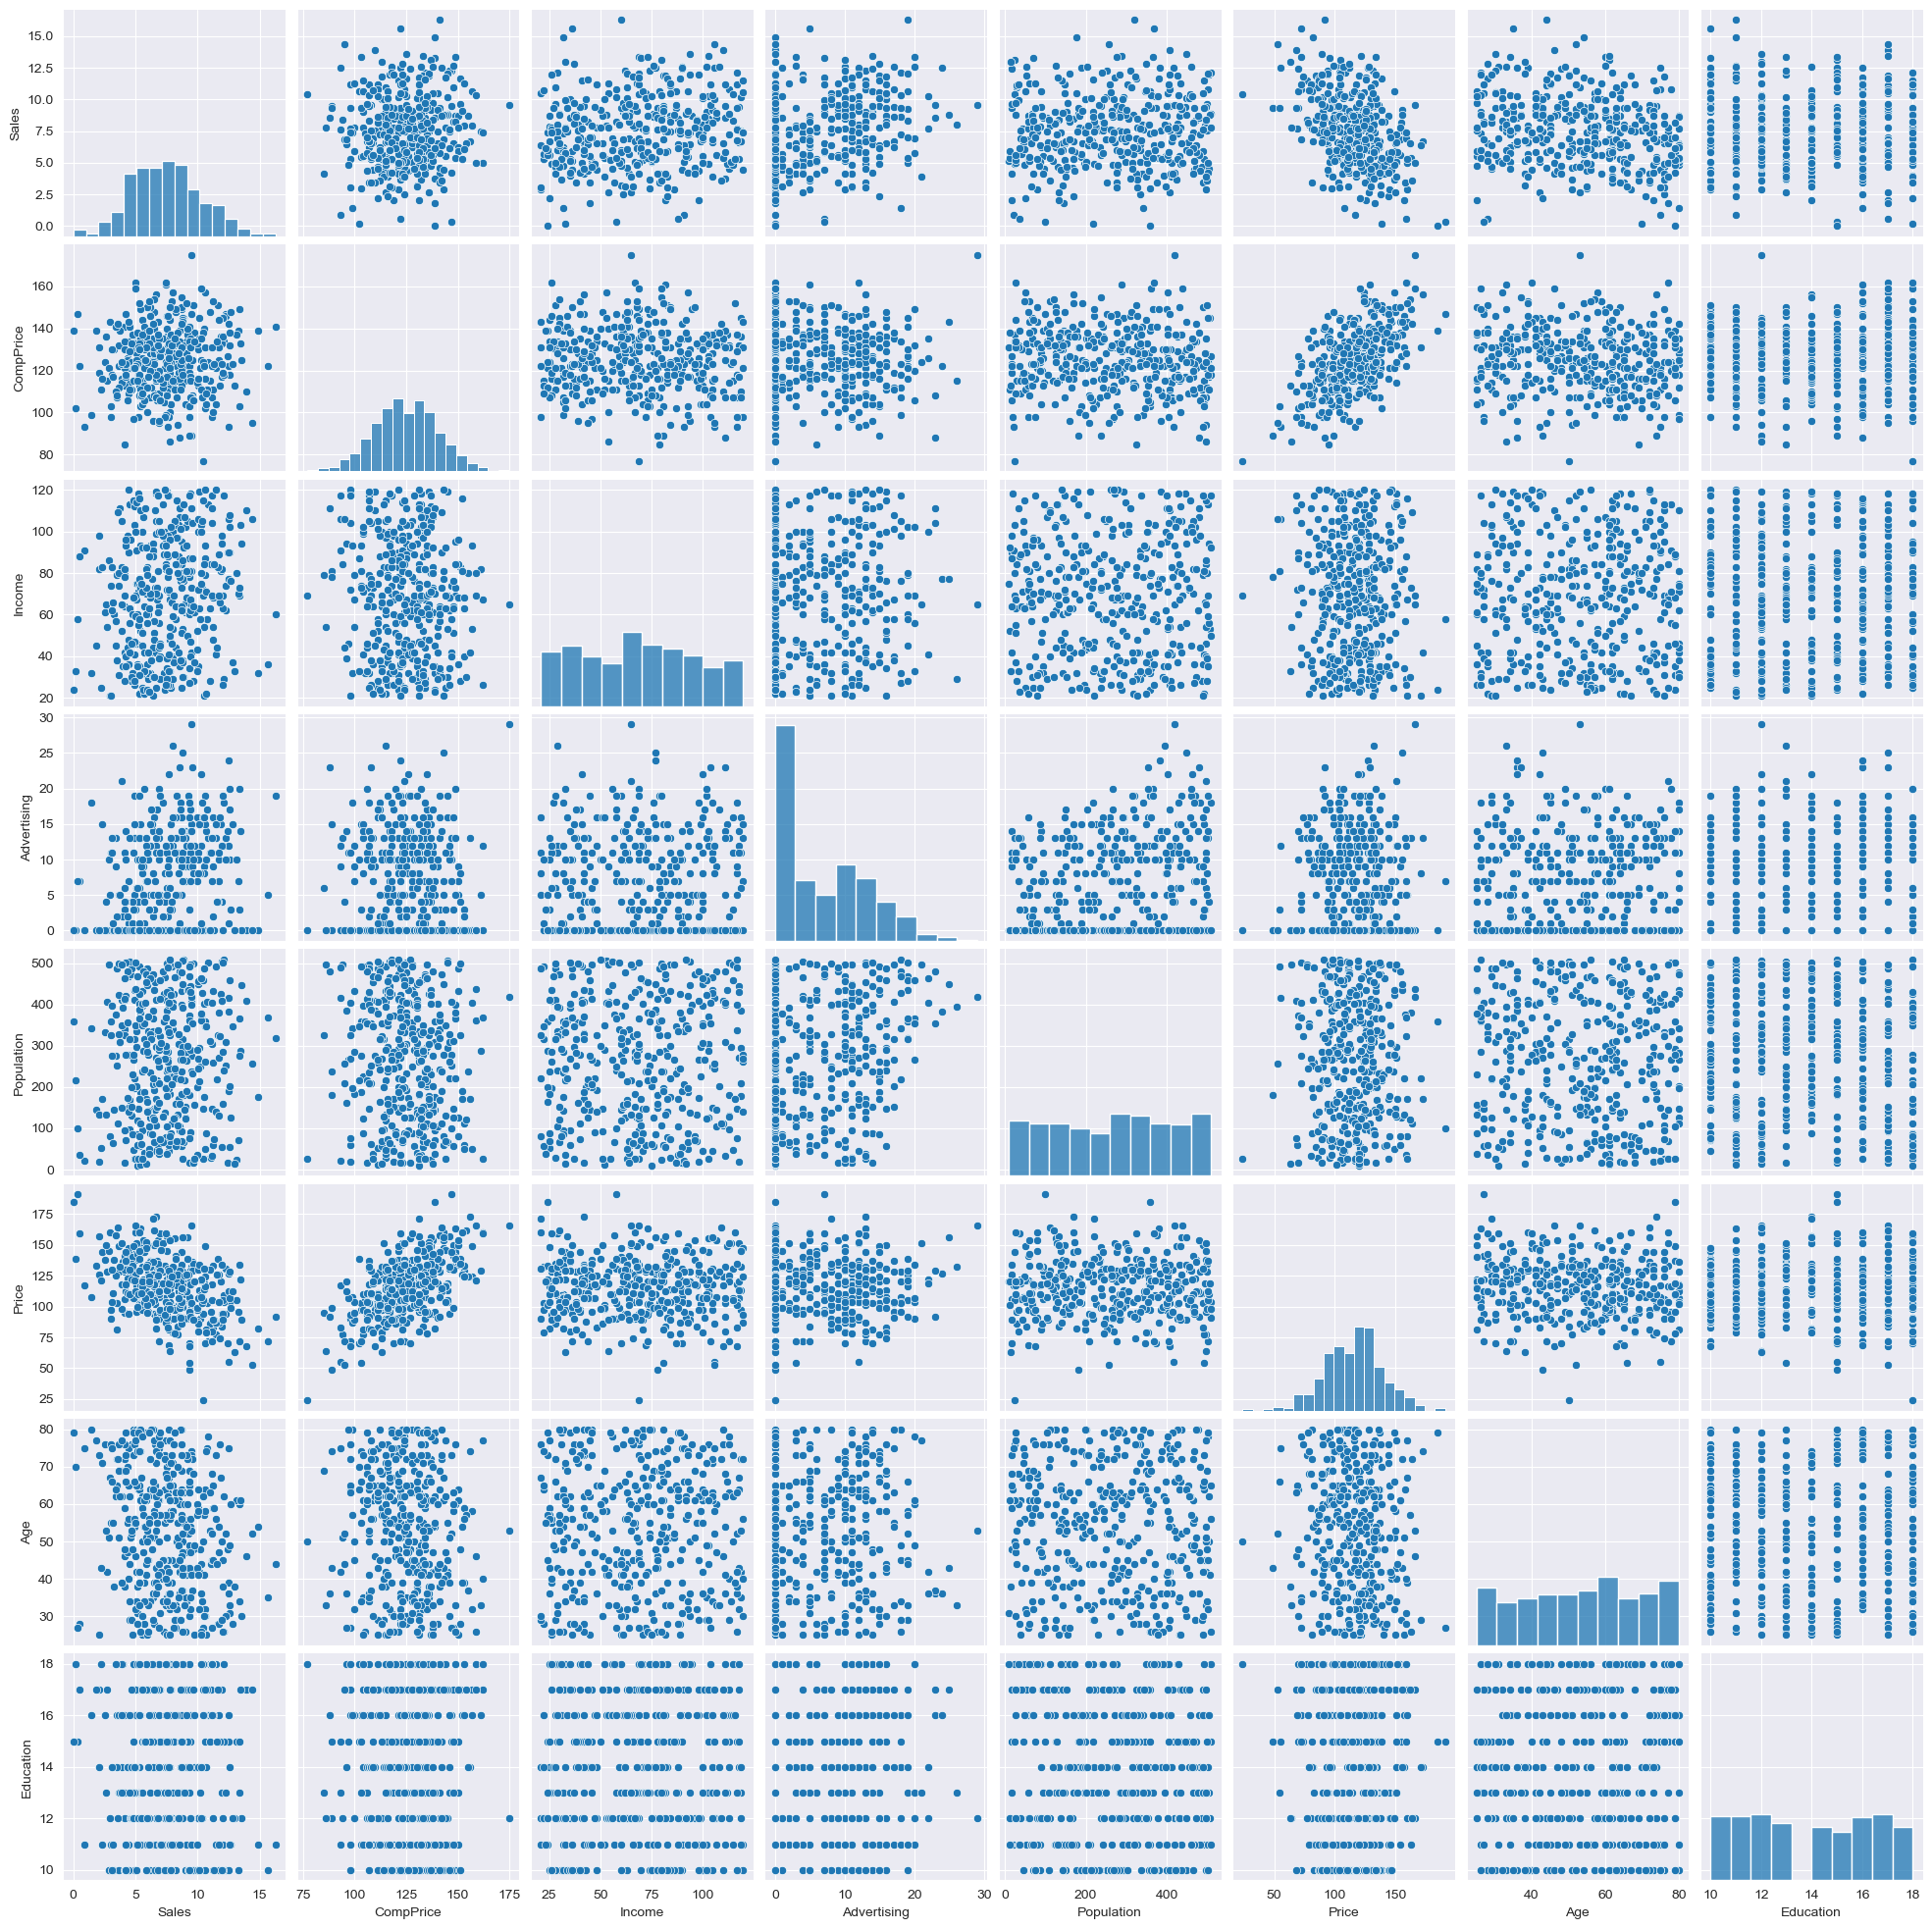

In [46]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in range(0,11):
    if ((df.dtypes[i])=="O"):
        df[df.columns[i]]=le.fit_transform(df[df.columns[i]])     
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [48]:
sales=[]
for i in range(0,400):
    if df["Sales"][i]>=df["Sales"].mean():
        sales.append("0")
    else:
        sales.append("1")
sales

['0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1'

In [49]:
df=pd.concat([df,pd.DataFrame({"SN":sales})],axis=1)

In [50]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SN
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [51]:
X=df.iloc[:,1:11]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [52]:
Y= df["SN"]
Y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: SN, Length: 400, dtype: object

In [53]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_cont  = SS.fit_transform(X)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(SS_cont,Y, test_size=0.30)

In [55]:
from sklearn.ensemble import RandomForestClassifier
Rfc= RandomForestClassifier(max_samples=0.7,criterion='gini',n_estimators=100,max_features=0.6,random_state=24,max_depth=4)
Rfc.fit(X_train,Y_train)
Y_Pred_train = Rfc.predict(X_train)
Y_Pred_test = Rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print("Training accuracy :",accuracy_score(Y_train,Y_Pred_train).round(2))
print("Test accuracy :",accuracy_score(Y_test,Y_Pred_test).round(2))

Training accuracy : 0.93
Test accuracy : 0.75


In [56]:
from sklearn.ensemble import BaggingClassifier
bag= BaggingClassifier(base_estimator=Rfc,max_samples=0.7,n_estimators=100,max_features=0.6,random_state=24)
bag.fit(X_train,Y_train)
Y_Pred_train = bag.predict(X_train)
Y_Pred_test = bag.predict(X_test)
from sklearn.metrics import accuracy_score
print("Training accuracy :",accuracy_score(Y_train,Y_Pred_train).round(2))
print("Test accuracy :",accuracy_score(Y_test,Y_Pred_test).round(2))

Training accuracy : 0.93
Test accuracy : 0.75


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
train_acc=[]
test_acc=[]
for i in range(1,700):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_cont,Y, test_size=0.30)

    RFC = RandomForestClassifier(max_samples= 0.6,criterion='entropy', n_estimators = 100, max_features = 0.6, random_state=24,max_depth=4)
    RFC.fit(X_train,Y_train)
    Y_Pred_train = RFC.predict(X_train)
    Y_Pred_test = RFC.predict(X_test)
    train_acc.append(accuracy_score(Y_train,Y_Pred_train).round(2))
    test_acc.append( accuracy_score(Y_test,Y_Pred_test).round(2))

print('Training accuracy', np.mean(train_acc))
print('Test accuracy', np.mean(test_acc))

Training accuracy 0.906137339055794
Test accuracy 0.7843061516452074


In [58]:
from sklearn.ensemble import BaggingClassifier
bag= BaggingClassifier(base_estimator=RFC,max_samples=0.7,n_estimators=100,max_features=0.6,random_state=24)
bag.fit(X_train,Y_train)
Y_Pred_train = bag.predict(X_train)
Y_Pred_test = bag.predict(X_test)
from sklearn.metrics import accuracy_score
print("Training accuracy :",accuracy_score(Y_train,Y_Pred_train).round(2))
print("Test accuracy :",accuracy_score(Y_test,Y_Pred_test).round(2))

Training accuracy : 0.9
Test accuracy : 0.81


In [59]:
train_acc=[]
test_acc=[]
for i in range(1,700):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_cont,Y, test_size=0.30)

    RFC = RandomForestClassifier(max_samples= 0.6,criterion='gini', n_estimators = 100, max_features = 0.6, random_state=24,max_depth=4)
    RFC.fit(X_train,Y_train)
    Y_Pred_train = RFC.predict(X_train)
    Y_Pred_test = RFC.predict(X_test)
    train_acc.append(accuracy_score(Y_train,Y_Pred_train).round(2))
    test_acc.append( accuracy_score(Y_test,Y_Pred_test).round(2))

print('Training accuracy', np.mean(train_acc))
print('Test accuracy', np.mean(test_acc))

Training accuracy 0.9107439198855508
Test accuracy 0.7774105865522176
